0
1
2


FileNotFoundError: [Errno 2] No such file or directory: 'RBM2.log'

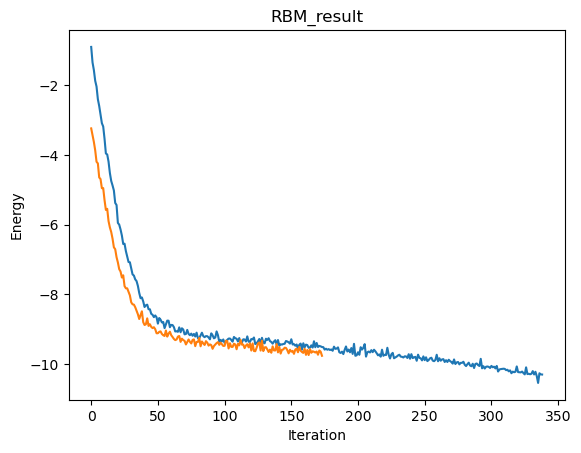

In [105]:
import json
import matplotlib.pyplot as plt
iters_ = []
E = []
a = 11
for i in range (a):
    print(i)
    data=json.load(open("RBM"+str(i)+".log"))
    iters = data['Energy']['iters']
    energy=data['Energy']['Mean']['real']
    iters_.append(iters)
    E.append(energy)
    plt.plot(iters, energy, label=str(i))
    plt.ylabel('Energy')
    plt.xlabel('Iteration')
    plt.title("RBM_result")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


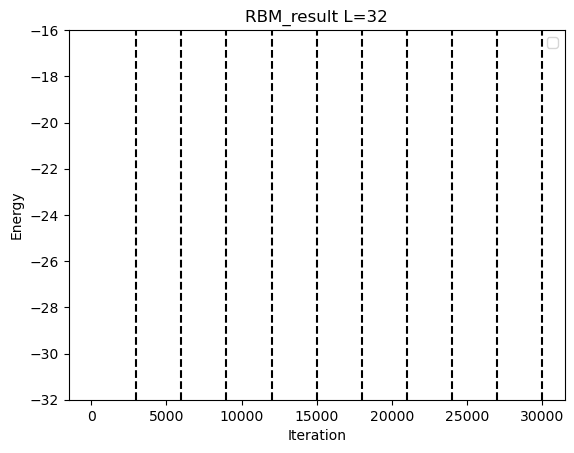

In [106]:
import numpy as np
flat_iter = [
    x
    for xs in iters_
    for x in xs
]
flat_E = [
    x
    for xs in E
    for x in xs
]
flat_iter = np.arange(len(flat_iter))
plt.plot(flat_iter, flat_E)
plt.title("RBM_result L=32")
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.ylim(-32, -16)
x = np.repeat(np.array([3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000, 27000, 30000]), 2).reshape(10, 2)
for i in range(len(x)):
    plt.plot(x[i], [-32, 0], color = 'black', linestyle = 'dashed')
plt.legend()


0
1
2
3
4
5
6
7
8
9
10


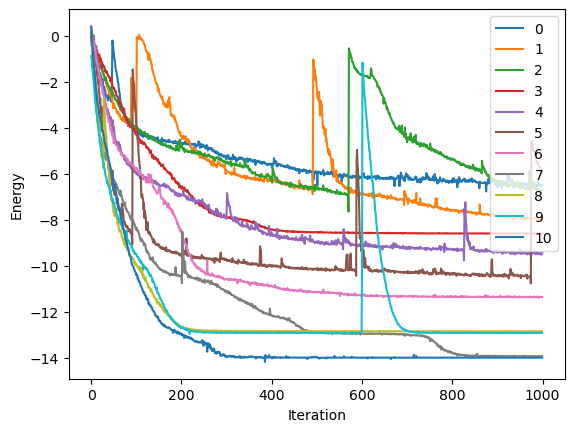

In [33]:
import json
import matplotlib.pyplot as plt
iters_ = []
E = []
for i in range (a):
    print(i)
    data=json.load(open("FFNN"+str(i)+".log"))
    iters = data['Energy']['iters']
    iters_.append(iters)
    energy=data['Energy']['Mean']['real']
    E.append(energy)
    plt.plot(iters, energy, label=str(i))
    plt.ylabel('Energy')
    plt.xlabel('Iteration')
    plt.legend()
 

In [ ]:
import numpy as np
flat_iter = [
    x
    for xs in iters_
    for x in xs
]
flat_E = [
    x
    for xs in E
    for x in xs
]
flat_iter = np.arange(len(flat_iter))
plt.plot(flat_iter, flat_E)
plt.title("RBM_result L=16")
plt.xlabel('Iteration')
plt.ylabel('Energy')
x = np.repeat(np.array([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]), 2).reshape(10, 2)
for i in range(len(x)):
    plt.plot(x[i], [-16, 0], color = 'black', linestyle = 'dashed', alpha = 0.5)
plt.legend()


(-14.0, -8.0)

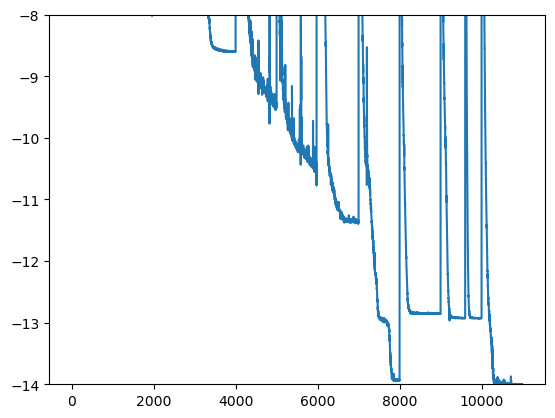

In [22]:
flat_iter = np.arange(len(flat_iter))
plt.plot(flat_iter, flat_E)
plt.ylim(-14, -8)

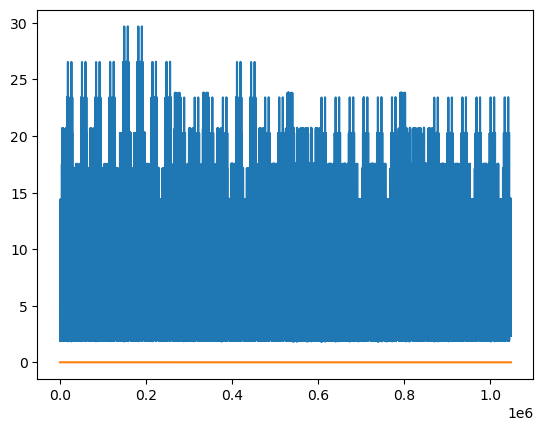

MemoryError: Allocation failed (probably too large).

In [82]:
import jax
import netket as nk
import numpy as np
from netket.operator.spin import sigmax,sigmaz
import time
import netket.nn as nknn
import flax.linen as nn
import jax.numpy as jnp
from scipy.sparse.linalg import eigsh
jax.config.update("jax_enable_x64", False)
import optax
import itertools

N = 20
hi = nk.hilbert.Spin(s = 1 / 2, N =  N)
g = nk.graph.Hypercube(length=N, n_dim=1, pbc=False)
angle_list = [0,  0.05*jnp.pi, 0.10*jnp.pi, 0.15*jnp.pi, 0.2*jnp.pi, 0.25*jnp.pi, 0.3*jnp.pi, 0.35*jnp.pi, 0.4*jnp.pi, 0.45*jnp.pi, 0.5*jnp.pi]

a = 0

for angle in angle_list:

    os = -jnp.cos(angle)**2*sigmaz(hi, 0)*sigmax(hi, 1)
    os += jnp.cos(angle)*jnp.sin(angle)*sigmaz(hi, 0)*sigmaz(hi, 1)
    os += jnp.sin(angle)**2*sigmax(hi, 0)*sigmaz(hi ,1)
    os -= jnp.cos(angle)*jnp.sin(angle)*sigmax(hi, 0)*sigmax(hi ,1) 

    for j in range(N - 3):
        os -= jnp.cos(angle)**3 * sigmax(hi, j) * sigmaz(hi, j + 1) * sigmax(hi, j + 2)
        os += jnp.cos(angle)**2 * jnp.sin(angle) * sigmaz(hi, j) * sigmaz(hi, j + 1) * sigmax(hi, j + 2)
        os -= jnp.cos(angle)**2 * jnp.sin(angle) * sigmax(hi, j) * sigmax(hi, j + 1) * sigmax(hi, j + 2)
        os += jnp.cos(angle)**2 * jnp.sin(angle) * sigmax(hi, j) * sigmaz(hi, j + 1) * sigmaz(hi, j + 2)
        os += jnp.cos(angle) * jnp.sin(angle)**2 * sigmaz(hi, j) * sigmax(hi, j + 1) * sigmax(hi, j + 2)
        os += jnp.cos(angle) * jnp.sin(angle)**2 * sigmax(hi, j) * sigmax(hi, j + 1) * sigmaz(hi, j + 2)
        os -= jnp.cos(angle) * jnp.sin(angle)**2 * sigmaz(hi, j) * sigmaz(hi, j + 1) * sigmaz(hi, j + 2)
        os -= jnp.sin(angle)**3 * sigmaz(hi, j) * sigmax(hi, j + 1) * sigmaz(hi, j + 2)
    
    # Additional lines outside the loop
    os -= jnp.cos(angle)**3 * sigmax(hi, N - 3) * sigmaz(hi, N - 2) * sigmaz(hi, N - 1)
    os += jnp.cos(angle)**2 * jnp.sin(angle) * sigmaz(hi, N - 3) * sigmaz(hi, N - 2) * sigmaz(hi, N - 1)
    os -= jnp.cos(angle)**2 * jnp.sin(angle) * sigmax(hi, N - 3) * sigmax(hi, N - 2) * sigmaz(hi, N - 1)
    os -= jnp.cos(angle)**2 * jnp.sin(angle) * sigmax(hi, N - 3) * sigmaz(hi, N - 2) * sigmax(hi, N - 1)
    os += jnp.cos(angle) * jnp.sin(angle)**2 * sigmaz(hi, N - 3) * sigmax(hi, N - 2) * sigmaz(hi, N - 1)
    os += jnp.cos(angle) * jnp.sin(angle)**2 * sigmaz(hi, N - 3) * sigmaz(hi, N - 2) * sigmax(hi, N - 1)
    os -= jnp.cos(angle) * jnp.sin(angle)**2 * sigmax(hi, N - 3) * sigmax(hi, N - 2) * sigmax(hi, N - 1)
    os += jnp.sin(angle)**3 * sigmaz(hi, N - 3) * sigmax(hi, N - 2) * sigmax(hi, N - 1)
    
    os -= jnp.cos(angle)**2 * sigmax(hi, N - 2) * sigmax(hi, N - 1)
    os += jnp.cos(angle) * jnp.sin(angle) * sigmax(hi, N - 2) * sigmaz(hi, N - 1)
    os -= jnp.sin(angle)**2 * sigmaz(hi, N - 2) * sigmaz(hi, N - 1)
    os += jnp.cos(angle) * jnp.sin(angle) * sigmaz(hi, N - 2) * sigmax(hi, N - 1)
    evals = nk.exact.lanczos_ed(os,  compute_eigenvectors=True)
    exact_gs = np.load("RBM"+str(a)+"L=20_amp.npy")
    plt.plot(np.abs(exact_gs))
    diff = np.abs(exact_gs/np.sum(np.abs(exact_gs)**2)-evals[1][:,0])
    plt.plot(diff)
    plt.show()
    a+=1
    


In [107]:
for a in range(11):
    nqs = np.load("RBM"+str(a)+"L=20_amp.npy")
    print(np.sum(np.exp(nqs)))
    print(np.linalg.norm(np.exp(nqs).astype(np.complex128)))

(-3103.143+14413.253j)
5127.412517157855
(5.9436464e+35+8.131994e+35j)
7.061293103630061e+36
(12811.472-1929.9862j)
532.0831245985441
(9590.617+3012.772j)
248.39859245870068
(16.419973+28.021029j)
0.5549243082277437
(29.022577-14.5783615j)
1.3077944904219954
(6149.466+9172.065j)
296.01409404789723
(14728156-10990687j)
410705.60712106153
(24823784-36920588j)
2705550.5360255074
(122691.08-427189.72j)
140716.39097845086
(392653.78+252434.05j)
329010.1880866957


C:\Users\Administrator\AppData\Local\Temp\ipykernel_29348\2067116880.py:9: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


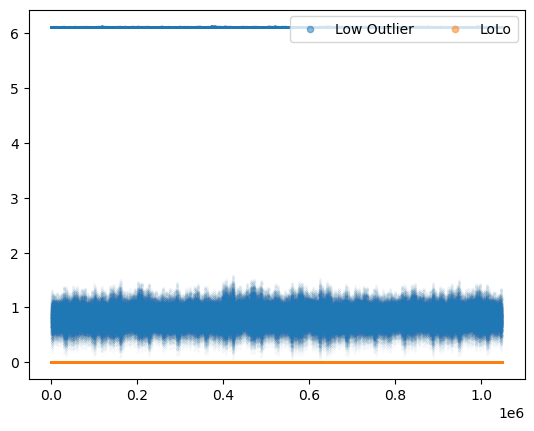

In [125]:
a = plt.scatter(np.arange(nqs.shape[0]), nqs, s=0.001, marker='o', label = "RBM", alpha = 0.5)
b = plt.scatter(np.arange(nqs.shape[0]), nqs/np.linalg.norm(nqs), s=0.001, marker='o',  label = "Exact", alpha = 0.5)
legend = plt.legend((a, b),
           ('Low Outlier', 'LoLo'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=10)
for handle in legend.legendHandles:
    handle._sizes = [20]  # Increase marker size in the legend


C:\Users\Administrator\AppData\Local\Temp\ipykernel_29348\334409231.py:16: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


nps_norm: 5127.412517157855
diff_sum: 1300.192
gs_sum 724.07806


C:\Users\Administrator\AppData\Local\Temp\ipykernel_29348\334409231.py:6: RuntimeWarning: overflow encountered in exp
  diff = np.abs(np.exp(nqs) / np.linalg.norm(np.exp(nqs)) - evals)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_29348\334409231.py:6: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(np.exp(nqs) / np.linalg.norm(np.exp(nqs)) - evals)


nps_norm: 7.061293103630061e+36
diff_sum: nan
gs_sum 825.8704


C:\Users\Administrator\AppData\Local\Temp\ipykernel_29348\334409231.py:33: RuntimeWarning: overflow encountered in exp
  trace_distance = np.sqrt(1-np.sum(np.abs(np.exp(nqs) / nqs_norm *evals))**2/2)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_29348\334409231.py:33: RuntimeWarning: invalid value encountered in divide
  trace_distance = np.sqrt(1-np.sum(np.abs(np.exp(nqs) / nqs_norm *evals))**2/2)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_29348\334409231.py:33: RuntimeWarning: invalid value encountered in multiply
  trace_distance = np.sqrt(1-np.sum(np.abs(np.exp(nqs) / nqs_norm *evals))**2/2)


nps_norm: 532.0831245985441
diff_sum: 1189.5658
gs_sum 817.62665


C:\Users\Administrator\AppData\Local\Temp\ipykernel_29348\334409231.py:33: RuntimeWarning: invalid value encountered in sqrt
  trace_distance = np.sqrt(1-np.sum(np.abs(np.exp(nqs) / nqs_norm *evals))**2/2)


nps_norm: 248.39859245870068
diff_sum: 1190.0143
gs_sum 730.8772
nps_norm: 0.5549243082277437
diff_sum: 1190.5155
gs_sum 628.69604
nps_norm: 1.3077944904219954
diff_sum: 1190.3895
gs_sum 544.5997
nps_norm: 296.01409404789723
diff_sum: 1197.2799
gs_sum 505.11465
nps_norm: 410705.60712106153
diff_sum: nan
gs_sum 548.15814
nps_norm: 2705550.5360255074
diff_sum: nan
gs_sum 668.86835
nps_norm: 140716.39097845086
diff_sum: 765.5281
gs_sum 738.509
nps_norm: 329010.1880866957
diff_sum: 912.4966
gs_sum 724.078


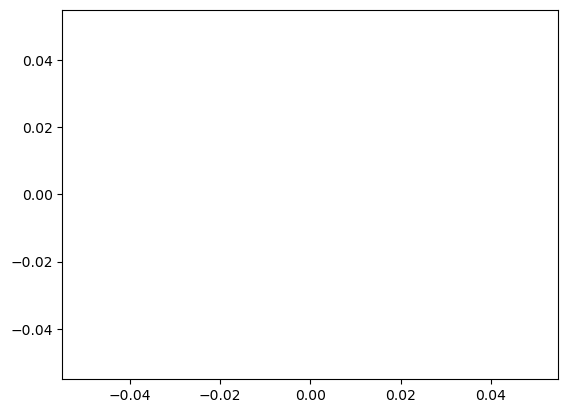

In [131]:
for a in range(11):
    evals = np.load("RBM"+str(a)+"_exact_L=20.npy")
    log_nqs = np.load("RBM" + str(a) + "L=20_amp.npy")
    nqs_norm = np.linalg.norm(np.exp(log_nqs).astype(np.complex128))
    nqs = np.exp(log_nqs)/np.log(nqs_norm)
    diff = np.abs(np.exp(nqs) / np.linalg.norm(np.exp(nqs)) - evals)
    
    plt.scatter(np.arange(evals.shape[0]), evals, s = 0.001, alpha = 0.5)
    plt.scatter(np.arange(diff.shape[0]), np.abs(nqs), s = 0.001, alpha = 0.5)
    plt.ylim(0, 0.01)
    legend = plt.legend(("Exact", "RBM"),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=10)
    for handle in legend.legendHandles:
        handle._sizes = [20]  # Increase marker size in the legend
    plt.ylabel('Abs_amp')
    plt.xlabel('Basis')
    plt.savefig("RBM" + str(a) + "L=20_amp_nqs.png", dpi = 200)
    plt.clf()
    
    plt.scatter(np.arange(diff.shape[0]), diff, s = 0.001)
    plt.ylim(0, 0.01)
    plt.ylabel('Abs_amp')
    plt.xlabel('Basis')
    plt.savefig("RBM" + str(a) + "L=20_amp_diff.png", dpi = 200)
    plt.clf()
    print("nps_norm:", nqs_norm)
    print("diff_sum:", np.sum(diff))
    print("gs_sum", np.sum(np.abs(evals)))
    a += 1
    trace_distance = np.sqrt(1-np.sum(np.abs(np.exp(nqs) / nqs_norm *evals))**2/2)
    plt.plot()

In [135]:
trace_dis = (np.sqrt(1-np.abs(np.sum(np.conj(nqs)*evals))**2))
E_diff = (json.load(open("RBM"+str(a-1)+"L=20"+".log"))['Energy']['Mean']['real'][-1]+20)
print(trace_dis)
print(E_diff)

0.5963471032730305
-1.52587890625e-05


0
1
2
3
4
5
6
7
8
9


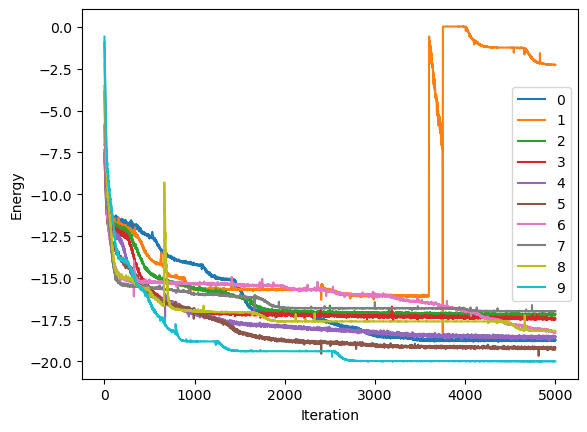

In [33]:
import json
import matplotlib.pyplot as plt
iters_ = []
E = []
for i in range (a):
    print(i)
    data=json.load(open("RBM"+str(i)+"L=20"+".log"))
    iters = data['Energy']['iters']
    iters_.append(iters)
    energy=data['Energy']['Mean']['real']
    E.append(energy)
    plt.plot(iters, energy, label=str(i))
    plt.ylabel('Energy')
    plt.xlabel('Iteration')
    plt.legend()
 

In [43]:
import msgpack
import netket as nk
with open('RBM0L=20.mpack', 'rb') as file:
    data = msgpack.unpack(file, raw=False)

In [55]:
import jax
import netket as nk
import numpy as np
from netket.operator.spin import sigmax,sigmaz
import time
import netket.nn as nknn
import flax.linen as nn
import jax.numpy as jnp
from scipy.sparse.linalg import eigsh
jax.config.update("jax_enable_x64", False)
import optax

N = 10
hi = nk.hilbert.Spin(s=1 / 2, N =  N)
g = nk.graph.Hypercube(length=N, n_dim=1, pbc=False)
angle_list = [0.5*jnp.pi,]

a = 0
for angle in angle_list:

    os = -jnp.cos(angle)**2*sigmaz(hi, 0)*sigmax(hi, 1)
    os += jnp.cos(angle)*jnp.sin(angle)*sigmaz(hi, 0)*sigmaz(hi, 1)
    os += jnp.sin(angle)**2*sigmax(hi, 0)*sigmaz(hi ,1)
    os -= jnp.cos(angle)*jnp.sin(angle)*sigmax(hi, 0)*sigmax(hi ,1) 

    for j in range(N - 3):
        os -= jnp.cos(angle)**3 * sigmax(hi, j) * sigmaz(hi, j + 1) * sigmax(hi, j + 2)
        os += jnp.cos(angle)**2 * jnp.sin(angle) * sigmaz(hi, j) * sigmaz(hi, j + 1) * sigmax(hi, j + 2)
        os -= jnp.cos(angle)**2 * jnp.sin(angle) * sigmax(hi, j) * sigmax(hi, j + 1) * sigmax(hi, j + 2)
        os += jnp.cos(angle)**2 * jnp.sin(angle) * sigmax(hi, j) * sigmaz(hi, j + 1) * sigmaz(hi, j + 2)
        os += jnp.cos(angle) * jnp.sin(angle)**2 * sigmaz(hi, j) * sigmax(hi, j + 1) * sigmax(hi, j + 2)
        os += jnp.cos(angle) * jnp.sin(angle)**2 * sigmax(hi, j) * sigmax(hi, j + 1) * sigmaz(hi, j + 2)
        os -= jnp.cos(angle) * jnp.sin(angle)**2 * sigmaz(hi, j) * sigmaz(hi, j + 1) * sigmaz(hi, j + 2)
        os -= jnp.sin(angle)**3 * sigmaz(hi, j) * sigmax(hi, j + 1) * sigmaz(hi, j + 2)
    
    # Additional lines outside the loop
    os -= jnp.cos(angle)**3 * sigmax(hi, N - 3) * sigmaz(hi, N - 2) * sigmaz(hi, N - 1)
    os += jnp.cos(angle)**2 * jnp.sin(angle) * sigmaz(hi, N - 3) * sigmaz(hi, N - 2) * sigmaz(hi, N - 1)
    os -= jnp.cos(angle)**2 * jnp.sin(angle) * sigmax(hi, N - 3) * sigmax(hi, N - 2) * sigmaz(hi, N - 1)
    os -= jnp.cos(angle)**2 * jnp.sin(angle) * sigmax(hi, N - 3) * sigmaz(hi, N - 2) * sigmax(hi, N - 1)
    os += jnp.cos(angle) * jnp.sin(angle)**2 * sigmaz(hi, N - 3) * sigmax(hi, N - 2) * sigmaz(hi, N - 1)
    os += jnp.cos(angle) * jnp.sin(angle)**2 * sigmaz(hi, N - 3) * sigmaz(hi, N - 2) * sigmax(hi, N - 1)
    os -= jnp.cos(angle) * jnp.sin(angle)**2 * sigmax(hi, N - 3) * sigmax(hi, N - 2) * sigmax(hi, N - 1)
    os += jnp.sin(angle)**3 * sigmaz(hi, N - 3) * sigmax(hi, N - 2) * sigmax(hi, N - 1)
    
    os -= jnp.cos(angle)**2 * sigmax(hi, N - 2) * sigmax(hi, N - 1)
    os += jnp.cos(angle) * jnp.sin(angle) * sigmax(hi, N - 2) * sigmaz(hi, N - 1)
    os -= jnp.sin(angle)**2 * sigmaz(hi, N - 2) * sigmaz(hi, N - 1)
    os += jnp.cos(angle) * jnp.sin(angle) * sigmaz(hi, N - 2) * sigmax(hi, N - 1)
    evals = nk.exact.lanczos_ed(os,  compute_eigenvectors=False)
    print(evals[0])
    # RBM ansatz with alpha=1
    
    ma = nk.models.RBM(alpha=4, param_dtype=complex)
    # Metropolis Exchange Sampling
    # Notice that this sampler exchanges two neighboring sites
    # thus preservers the total magnetization
    sa = nk.sampler.MetropolisLocal(hilbert = hi)
    
    # Optimizer
    op = nk.optimizer.Sgd(learning_rate=0.01)
    
    # Stochastic Reconfiguration
    sr = nk.optimizer.SR(diag_shift=optax.linear_schedule(0.03, 0.01, 1000))
    
    # The variational state
    vs = nk.vqs.MCState(sa, ma, n_samples=1024)
    
    # The ground-state optimization loop
    gs = nk.VMC(
        hamiltonian=os,
        optimizer=op,
        preconditioner=sr,
        variational_state=vs)
    
    start = time.time()
    gs.run(out='RBM'+str(a)+"L=10", n_iter=1000)
    end = time.time()
    a += 1
    print('### Symmetric RBM calculation')
    print('Has',vs.n_parameters,'parameters')
    print('The Symmetric RBM calculation took',end-start,'seconds')


-10.000003


  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\Administrator\anaconda3\lib\site-packages\netket\optimizer\qgt\qgt_onthefly.py:110: HolomorphicUndeclaredWarning: 
Defaulting to `holomorphic=False`, but this might lead to increased
computational cost or disabled features. Check if your variational
function is holomorphic, and if so specify `holomorphic=True`as an extra
keyword argument.

To silence this warning, specify the `holomorphic=False/True` keyword
argument.

To numerically check whether your variational function is or not holomorphic
you can use the following snippet:

```python
   vs = nk.vqs.MCState(...)

   nk.utils.is_probably_holomorphic(vs._apply_fun, vs.parameters, vs.samples, vs.model_state)
```

if `nk.utils.is_probably_holomorphic` returns False, then your function is not holomorphic.
If it returns True, it is probably holomorphic.


-------------------------------------------------------
For more detailed informations, visit the following link:
	 https://netket.read

### Symmetric RBM calculation
Has 450 parameters
The Symmetric RBM calculation took 154.2185091972351 seconds


In [92]:
np.flip(np.array(list(itertools.product([1, -1], repeat=N)))) == np.array(list(itertools.product([-1, 1], repeat=N)))

array([[-1, -1, -1, ..., -1, -1, -1],
       [ 1, -1, -1, ..., -1, -1, -1],
       [-1,  1, -1, ..., -1, -1, -1],
       ...,
       [ 1, -1,  1, ...,  1,  1,  1],
       [-1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1]])

In [86]:
np.array(list(itertools.product([1, -1], repeat=N)))

[(1, 1, 1, 1, 1, 1, 1, 1, 1, 1),
 (1, 1, 1, 1, 1, 1, 1, 1, 1, -1),
 (1, 1, 1, 1, 1, 1, 1, 1, -1, 1),
 (1, 1, 1, 1, 1, 1, 1, 1, -1, -1),
 (1, 1, 1, 1, 1, 1, 1, -1, 1, 1),
 (1, 1, 1, 1, 1, 1, 1, -1, 1, -1),
 (1, 1, 1, 1, 1, 1, 1, -1, -1, 1),
 (1, 1, 1, 1, 1, 1, 1, -1, -1, -1),
 (1, 1, 1, 1, 1, 1, -1, 1, 1, 1),
 (1, 1, 1, 1, 1, 1, -1, 1, 1, -1),
 (1, 1, 1, 1, 1, 1, -1, 1, -1, 1),
 (1, 1, 1, 1, 1, 1, -1, 1, -1, -1),
 (1, 1, 1, 1, 1, 1, -1, -1, 1, 1),
 (1, 1, 1, 1, 1, 1, -1, -1, 1, -1),
 (1, 1, 1, 1, 1, 1, -1, -1, -1, 1),
 (1, 1, 1, 1, 1, 1, -1, -1, -1, -1),
 (1, 1, 1, 1, 1, -1, 1, 1, 1, 1),
 (1, 1, 1, 1, 1, -1, 1, 1, 1, -1),
 (1, 1, 1, 1, 1, -1, 1, 1, -1, 1),
 (1, 1, 1, 1, 1, -1, 1, 1, -1, -1),
 (1, 1, 1, 1, 1, -1, 1, -1, 1, 1),
 (1, 1, 1, 1, 1, -1, 1, -1, 1, -1),
 (1, 1, 1, 1, 1, -1, 1, -1, -1, 1),
 (1, 1, 1, 1, 1, -1, 1, -1, -1, -1),
 (1, 1, 1, 1, 1, -1, -1, 1, 1, 1),
 (1, 1, 1, 1, 1, -1, -1, 1, 1, -1),
 (1, 1, 1, 1, 1, -1, -1, 1, -1, 1),
 (1, 1, 1, 1, 1, -1, -1, 1, -1, -1),
 (1, 1, 1, 1

In [94]:
print(np.flip(np.array(list(itertools.product([-1, 1], repeat=N)))))
print(np.flip(np.flip(np.array(list(itertools.product([-1, 1], repeat=N)))), axis = 1))


[[ 1  1  1 ...  1  1  1]
 [-1  1  1 ...  1  1  1]
 [ 1 -1  1 ...  1  1  1]
 ...
 [-1  1 -1 ... -1 -1 -1]
 [ 1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]
[[ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1 -1]
 [ 1  1  1 ...  1 -1  1]
 ...
 [-1 -1 -1 ... -1  1 -1]
 [-1 -1 -1 ... -1 -1  1]
 [-1 -1 -1 ... -1 -1 -1]]


In [81]:
combinations = np.array(list(itertools.product([1, -1], repeat=N)))

In [82]:
nqs = vs.log_value(combinations)
nqs_normalize = np.exp(nqs)/np.linalg.norm(np.exp(nqs))
evals = nk.exact.lanczos_ed(os,  compute_eigenvectors=True)
inner = np.abs(np.sum(np.conj(nqs_normalize)*evals[1][:,0]))
print(evals[1][:,0])
print(nqs_normalize)
print(inner)

[ 4.4194210e-02  3.7252903e-09 -1.1175871e-08 ... -3.7252903e-09
 -7.4505806e-09  4.4194173e-02]
[ 4.2684887e-02+1.1191414e-02j  4.3278231e-04-1.9803342e-06j
  3.3799748e-04+2.3308441e-04j ... -2.0572267e-04+2.5305440e-04j
  4.9980648e-05+5.0484354e-04j  4.2803116e-02+1.1265832e-02j]
1.0165656e-05


In [75]:
os_sp = os.to_sparse()
eig = eigsh(os_sp, k=20, which='SA')
for i in range(20):
    print(np.abs(np.sum(np.conj(nqs_normalize)*eig[1][:, i])))

1.0131489e-05
0.000232141
0.0003618921
0.0005920576
0.00015124318
0.00012683982
6.185891e-05
0.00025280612
0.0006110304
0.00027540332
0.0001735226
0.06871364
0.26503402
0.008667484
0.3282139
0.20218064
0.13112676
0.19296014
0.005893634
0.2922677


C:\Users\Administrator\anaconda3\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


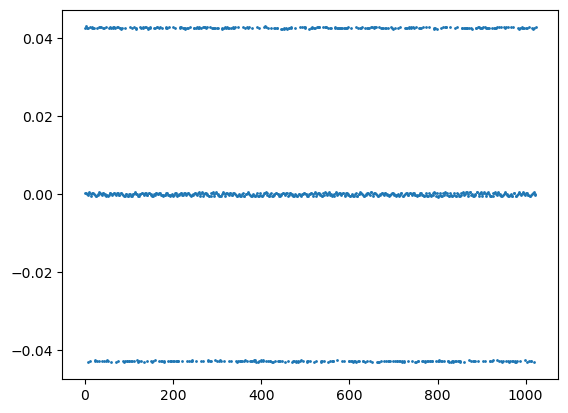

In [78]:
plt.scatter(np.arange(nqs_normalize.shape[0]), np.flip(nqs_normalize, s = 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


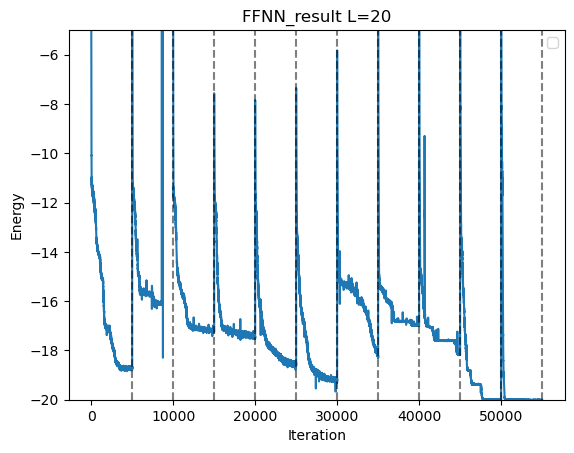

In [127]:
import numpy as np
flat_iter = [
    x
    for xs in iters_
    for x in xs
]
flat_E = [
    x
    for xs in E
    for x in xs
]
flat_iter = np.arange(len(flat_iter))
plt.plot(flat_iter, flat_E)
plt.title("FFNN_result L=20")
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.ylim(-20, -5)
x = np.repeat(np.linspace(5000, 55000, 11), 2).reshape(11, 2)
for i in range(len(x)):
    plt.plot(x[i], [-20, 0], color = 'black', linestyle = 'dashed', alpha = 0.5)
plt.legend()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_31996\3334360936.py:71: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:
C:\Users\Administrator\AppData\Local\Temp\ipykernel_31996\3334360936.py:87: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


nps_norm: 5127.412517157855
diff_sum: (-2.0194182+2.811019j)
gs_sum 724.07806
nps_norm: 7.061293103630061e+36
diff_sum: (-4.36505+0.115163036j)
gs_sum 825.8704
nps_norm: 532.0831245985441
diff_sum: (33.467243-3.627226j)
gs_sum 817.62665
nps_norm: 248.39859245870068
diff_sum: (23.743206+12.128787j)
gs_sum 730.8772
nps_norm: 0.5549243082277437
diff_sum: (10.946775+50.49521j)
gs_sum 628.69604
nps_norm: 1.3077944904219954
diff_sum: (3.146066-11.147285j)
gs_sum 544.5997
nps_norm: 296.01409404789723
diff_sum: (4.6962442+30.985237j)
gs_sum 505.11465
nps_norm: 410705.60712106153
diff_sum: (24.58898-26.760492j)
gs_sum 548.15814
nps_norm: 2705550.5360255074
diff_sum: (2.6207936-13.646237j)
gs_sum 668.86835
nps_norm: 140716.39097845086
diff_sum: (-2.2979357-3.035821j)
gs_sum 738.509
nps_norm: 329010.1880866957
diff_sum: (-0.22077161+0.7672531j)
gs_sum 724.078


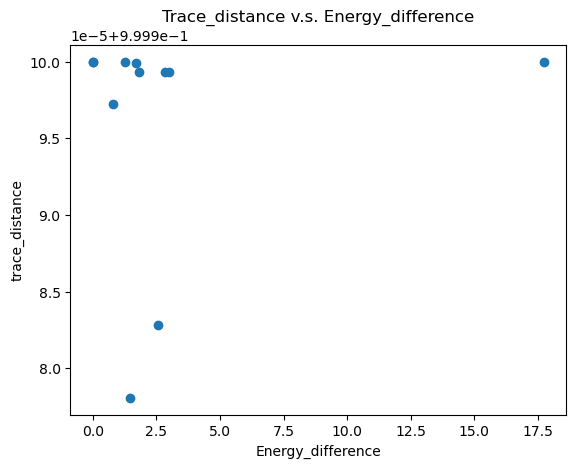

In [1]:
import jax
import netket as nk
import numpy as np
from netket.operator.spin import sigmax, sigmaz
import time
import netket.nn as nknn
import flax.linen as nn
import jax.numpy as jnp
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
jax.config.update("jax_enable_x64", False)
import optax
import itertools
import json
N = 20
hi = nk.hilbert.Spin(s=1 / 2, N=N)
g = nk.graph.Hypercube(length=N, n_dim=1, pbc=False)
angle_list = [0, 0.05 * jnp.pi, 0.10 * jnp.pi, 0.15 * jnp.pi, 0.2 * jnp.pi, 0.25 * jnp.pi, 0.3 * jnp.pi, 0.35 * jnp.pi,
              0.4 * jnp.pi, 0.45 * jnp.pi, 0.5 * jnp.pi]

a = 0
trace_dis = []
E_diff = []
for angle in angle_list:
    '''
    os = -jnp.cos(angle) ** 2 * sigmaz(hi, 0) * sigmax(hi, 1)
    os += jnp.cos(angle) * jnp.sin(angle) * sigmaz(hi, 0) * sigmaz(hi, 1)
    os += jnp.sin(angle) ** 2 * sigmax(hi, 0) * sigmaz(hi, 1)
    os -= jnp.cos(angle) * jnp.sin(angle) * sigmax(hi, 0) * sigmax(hi, 1)

    for j in range(N - 3):
        os -= jnp.cos(angle) ** 3 * sigmax(hi, j) * sigmaz(hi, j + 1) * sigmax(hi, j + 2)
        os += jnp.cos(angle) ** 2 * jnp.sin(angle) * sigmaz(hi, j) * sigmaz(hi, j + 1) * sigmax(hi, j + 2)
        os -= jnp.cos(angle) ** 2 * jnp.sin(angle) * sigmax(hi, j) * sigmax(hi, j + 1) * sigmax(hi, j + 2)
        os += jnp.cos(angle) ** 2 * jnp.sin(angle) * sigmax(hi, j) * sigmaz(hi, j + 1) * sigmaz(hi, j + 2)
        os += jnp.cos(angle) * jnp.sin(angle) ** 2 * sigmaz(hi, j) * sigmax(hi, j + 1) * sigmax(hi, j + 2)
        os += jnp.cos(angle) * jnp.sin(angle) ** 2 * sigmax(hi, j) * sigmax(hi, j + 1) * sigmaz(hi, j + 2)
        os -= jnp.cos(angle) * jnp.sin(angle) ** 2 * sigmaz(hi, j) * sigmaz(hi, j + 1) * sigmaz(hi, j + 2)
        os -= jnp.sin(angle) ** 3 * sigmaz(hi, j) * sigmax(hi, j + 1) * sigmaz(hi, j + 2)

    # Additional lines outside the loop
    os -= jnp.cos(angle) ** 3 * sigmax(hi, N - 3) * sigmaz(hi, N - 2) * sigmaz(hi, N - 1)
    os += jnp.cos(angle) ** 2 * jnp.sin(angle) * sigmaz(hi, N - 3) * sigmaz(hi, N - 2) * sigmaz(hi, N - 1)
    os -= jnp.cos(angle) ** 2 * jnp.sin(angle) * sigmax(hi, N - 3) * sigmax(hi, N - 2) * sigmaz(hi, N - 1)
    os -= jnp.cos(angle) ** 2 * jnp.sin(angle) * sigmax(hi, N - 3) * sigmaz(hi, N - 2) * sigmax(hi, N - 1)
    os += jnp.cos(angle) * jnp.sin(angle) ** 2 * sigmaz(hi, N - 3) * sigmax(hi, N - 2) * sigmaz(hi, N - 1)
    os += jnp.cos(angle) * jnp.sin(angle) ** 2 * sigmaz(hi, N - 3) * sigmaz(hi, N - 2) * sigmax(hi, N - 1)
    os -= jnp.cos(angle) * jnp.sin(angle) ** 2 * sigmax(hi, N - 3) * sigmax(hi, N - 2) * sigmax(hi, N - 1)
    os += jnp.sin(angle) ** 3 * sigmaz(hi, N - 3) * sigmax(hi, N - 2) * sigmax(hi, N - 1)

    os -= jnp.cos(angle) ** 2 * sigmax(hi, N - 2) * sigmax(hi, N - 1)
    os += jnp.cos(angle) * jnp.sin(angle) * sigmax(hi, N - 2) * sigmaz(hi, N - 1)
    os -= jnp.sin(angle) ** 2 * sigmaz(hi, N - 2) * sigmaz(hi, N - 1)
    os += jnp.cos(angle) * jnp.sin(angle) * sigmaz(hi, N - 2) * sigmax(hi, N - 1)
    evals = nk.exact.lanczos_ed(os, compute_eigenvectors=True)
    np.save("RBM"+str(a)+"_exact_L=20.npy", evals[1][:, 0])
    '''
    evals = np.load("RBM"+str(a)+"_exact_L=20.npy")
    nqs = np.load("RBM" + str(a) + "L=20_numsample4096_amp.npy")
    nqs_norm = np.linalg.norm(np.exp(nqs).astype(np.complex128))
    diff = (np.exp(nqs) / nqs_norm - evals)

    plt.scatter(np.arange(evals.shape[0]), np.abs(evals), s = 0.001, alpha = 0.2)
    plt.scatter(np.arange(diff.shape[0]), np.abs(np.exp(nqs) / nqs_norm), s = 0.001, alpha = 0.2)
    plt.ylim(-0.001, 0.01)
    legend = plt.legend(("Exact", "RBM"),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=10)
    for handle in legend.legendHandles:
        handle._sizes = [20]  # Increase marker size in the legend
    plt.ylabel('Amp_value')
    plt.xlabel('Basis')
    plt.title("Amp_value: exact v.s. nqs")
    plt.savefig("RBM" + str(a) + "L=20_amp_value_exact_nqs.png", dpi = 150)
    plt.clf()
    
    plt.scatter(np.arange(evals.shape[0]), np.angle(evals), s = 0.01, alpha = 0.2)
    plt.scatter(np.arange(diff.shape[0]), np.angle(np.exp(nqs) / nqs_norm), s = 0.01, alpha = 0.2)
    plt.ylim(-np.pi-0.1, np.pi+0.1)
    legend = plt.legend(("Exact", "RBM"),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=10)
    for handle in legend.legendHandles:
        handle._sizes = [20]  # Increase marker size in the legend
    plt.ylabel('Amp_phase')
    plt.xlabel('Basis')
    plt.title("Amp_phase: exact v.s. nqs")
    plt.savefig("RBM" + str(a) + "L=20_amp_phase_exact_nqs.png", dpi = 150)
    plt.clf()

    plt.scatter(np.arange(diff.shape[0]), np.abs(diff), s = 0.001, alpha = 0.2, color='darkred')
    plt.ylim(-0.001, 0.01)
    plt.ylabel('Amp_value')
    plt.xlabel('Basis')
    plt.title("Amp_value_diff")
    plt.savefig("RBM" + str(a) + "L=20_amp_value_diff.png", dpi = 150)
    plt.clf()

    plt.scatter(np.arange(diff.shape[0]), np.angle(np.exp(nqs)/nqs_norm)-np.angle(evals), s = 0.01, alpha = 0.2, color = 'darkgreen')
    plt.ylim(-np.pi-0.1, np.pi+0.1)
    plt.ylabel('Abs_phase')
    plt.xlabel('Basis')
    plt.title("Amp_phase_diff")
    plt.savefig("RBM" + str(a) + "L=20_amp_phase_diff.png", dpi = 150)
    plt.clf()
    
    trace_dis.append(np.sqrt(1-np.abs(np.sum(np.conj(np.exp(nqs)/nqs_norm)*evals))**2))
    E_diff.append(json.load(open("RBM"+str(a)+"L=20"+".log"))['Energy']['Mean']['real'][-1]+20)
    print("nps_norm:", nqs_norm)
    print("diff_sum:", np.sum(diff))
    print("gs_sum", np.sum(np.abs(evals)))
    a += 1
plt.scatter(E_diff, trace_dis)
plt.ylabel("trace_distance")
plt.xlabel("Energy_difference")
plt.title("Trace_distance v.s. Energy_difference")
plt.savefig("RBM_L=20_tdiff_Ediff.png", dpi = 150)


trace_dis: [0.7308411142723896]
E_diff: [1.2653560638427734]
trace_dis: [0.7308411142723896, 0.9999997359323672]
E_diff: [1.2653560638427734, 17.746442317962646]
trace_dis: [0.7308411142723896, 0.9999997359323672, 0.9050089578044592]
E_diff: [1.2653560638427734, 17.746442317962646, 2.8543434143066406]
trace_dis: [0.7308411142723896, 0.9999997359323672, 0.9050089578044592, 0.8761866959922073]
E_diff: [1.2653560638427734, 17.746442317962646, 2.8543434143066406, 2.5560474395751953]
trace_dis: [0.7308411142723896, 0.9999997359323672, 0.9050089578044592, 0.8761866959922073, 0.618462233565652]
E_diff: [1.2653560638427734, 17.746442317962646, 2.8543434143066406, 2.5560474395751953, 1.4589710235595703]
trace_dis: [0.7308411142723896, 0.9999997359323672, 0.9050089578044592, 0.8761866959922073, 0.618462233565652, 0.42638244882780274]
E_diff: [1.2653560638427734, 17.746442317962646, 2.8543434143066406, 2.5560474395751953, 1.4589710235595703, 0.7781944274902344]
trace_dis: [0.7308411142723896, 0.9

Text(0.5, 0, 'energy_diff')

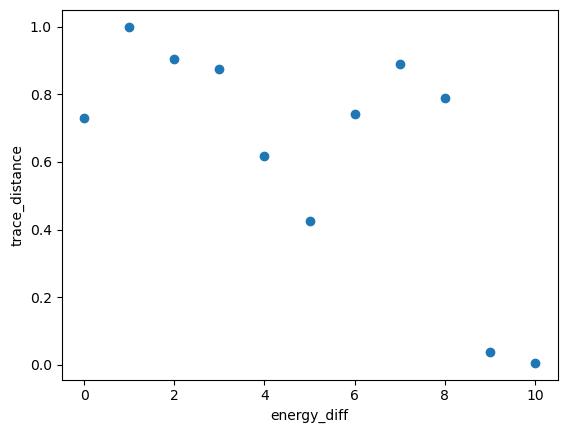

In [107]:
trace_dis = []
E_diff = []
for a in range(11):
    evals = np.load("RBM"+str(a)+"_exact_L=20.npy")
    nqs = np.load("RBM" + str(a) + "L=20_amp.npy")
    nqs_norm = np.linalg.norm(np.exp(nqs).astype(np.complex128))
    diff = (np.exp(nqs) / nqs_norm - evals)
    trace_dis.append(np.sqrt(1-np.abs(np.sum(np.conj(np.flip(np.exp(nqs))/nqs_norm)*evals))**2))
    E_diff.append(json.load(open("RBM"+str(a)+"L=20"+".log"))['Energy']['Mean']['real'][-1]+20)
    print("trace_dis:", trace_dis)
    print("E_diff:", E_diff)

plt.scatter(np.arange(11), trace_dis)
plt.ylabel("trace_distance")
plt.xlabel("energy_diff")

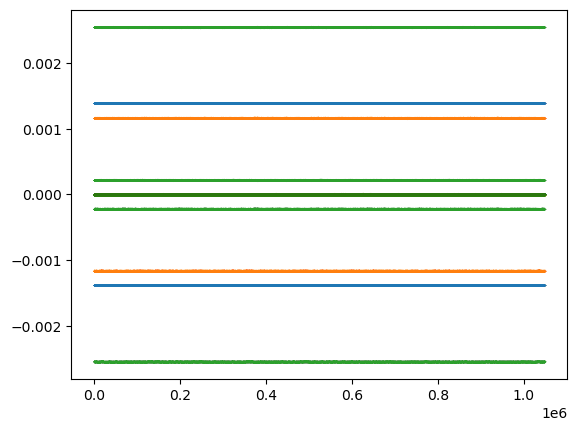

In [27]:
plt.scatter(np.arange(evals.shape[0]), evals, s = 0.001, alpha = 0.2)
plt.scatter(np.arange(diff.shape[0]), np.real(np.exp(nqs) / nqs_norm), s = 0.001, alpha = 0.2)
plt.scatter(np.arange(diff.shape[0]), evals-np.real(np.exp(nqs) / nqs_norm), s = 0.001, alpha = 0.2)

In [23]:
evals

array([ 1.3810673e-03,  5.8207661e-10, -8.7311491e-10, ...,
       -4.0745363e-10, -5.8207661e-10,  1.3810694e-03], dtype=float32)

In [24]:
np.exp(nqs)/nqs_norm

array([ 1.1621034e-03+7.4510154e-04j,  5.2676050e-06+5.4815869e-06j,
        5.5271307e-06+4.8556598e-07j, ..., -2.0888174e-06-4.9810365e-06j,
        7.3199449e-06-2.3409627e-06j,  1.1633458e-03+7.4664550e-04j],
      dtype=complex64)

In [108]:
np.abs((np.sum(np.conj(np.flip(np.exp(nqs))/nqs_norm)*evals))**2)

0.999966645835034

In [31]:
nqs.expect(os)

AttributeError: 'numpy.ndarray' object has no attribute 'expect'

In [95]:
list(itertools.product([1, -1], repeat=N))

[(1, 1, 1, 1, 1, 1, 1, 1, 1, 1),
 (1, 1, 1, 1, 1, 1, 1, 1, 1, -1),
 (1, 1, 1, 1, 1, 1, 1, 1, -1, 1),
 (1, 1, 1, 1, 1, 1, 1, 1, -1, -1),
 (1, 1, 1, 1, 1, 1, 1, -1, 1, 1),
 (1, 1, 1, 1, 1, 1, 1, -1, 1, -1),
 (1, 1, 1, 1, 1, 1, 1, -1, -1, 1),
 (1, 1, 1, 1, 1, 1, 1, -1, -1, -1),
 (1, 1, 1, 1, 1, 1, -1, 1, 1, 1),
 (1, 1, 1, 1, 1, 1, -1, 1, 1, -1),
 (1, 1, 1, 1, 1, 1, -1, 1, -1, 1),
 (1, 1, 1, 1, 1, 1, -1, 1, -1, -1),
 (1, 1, 1, 1, 1, 1, -1, -1, 1, 1),
 (1, 1, 1, 1, 1, 1, -1, -1, 1, -1),
 (1, 1, 1, 1, 1, 1, -1, -1, -1, 1),
 (1, 1, 1, 1, 1, 1, -1, -1, -1, -1),
 (1, 1, 1, 1, 1, -1, 1, 1, 1, 1),
 (1, 1, 1, 1, 1, -1, 1, 1, 1, -1),
 (1, 1, 1, 1, 1, -1, 1, 1, -1, 1),
 (1, 1, 1, 1, 1, -1, 1, 1, -1, -1),
 (1, 1, 1, 1, 1, -1, 1, -1, 1, 1),
 (1, 1, 1, 1, 1, -1, 1, -1, 1, -1),
 (1, 1, 1, 1, 1, -1, 1, -1, -1, 1),
 (1, 1, 1, 1, 1, -1, 1, -1, -1, -1),
 (1, 1, 1, 1, 1, -1, -1, 1, 1, 1),
 (1, 1, 1, 1, 1, -1, -1, 1, 1, -1),
 (1, 1, 1, 1, 1, -1, -1, 1, -1, 1),
 (1, 1, 1, 1, 1, -1, -1, 1, -1, -1),
 (1, 1, 1, 1

In [99]:
print(np.array(list(itertools.product([-1, 1], repeat=N))))
print(np.flip(np.array(list(itertools.product([-1, 1], repeat=N))), axis=0))

[[-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1  1]
 [-1 -1 -1 ... -1  1 -1]
 ...
 [ 1  1  1 ...  1 -1  1]
 [ 1  1  1 ...  1  1 -1]
 [ 1  1  1 ...  1  1  1]]
[[ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1 -1]
 [ 1  1  1 ...  1 -1  1]
 ...
 [-1 -1 -1 ... -1  1 -1]
 [-1 -1 -1 ... -1 -1  1]
 [-1 -1 -1 ... -1 -1 -1]]


In [101]:
print(np.exp(nqs))

[37.94441   +9.9485226e+00j  0.38471857-1.7604033e-03j
  0.3004603 +2.0719863e-01j ... -0.18287562+2.2495079e-01j
  0.04442992+4.4877684e-01j 38.049507  +1.0014676e+01j]


In [102]:
print(np.flip(np.exp(nqs)))

[38.049507  +1.0014676e+01j  0.04442992+4.4877684e-01j
 -0.18287562+2.2495079e-01j ...  0.3004603 +2.0719863e-01j
  0.38471857-1.7604033e-03j 37.94441   +9.9485226e+00j]


Text(0.5, 1.0, 'Trace_distance v.s. Rotation_angle L = 20 numsample 2048')

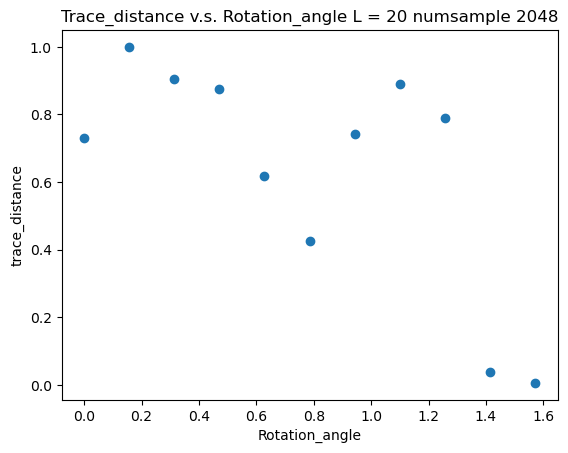

In [130]:
trace_dis = []
E_diff = []
for a in range(11):
    evals = np.load("RBM"+str(a)+"_exact_L=20.npy")
    nqs = np.load("RBM" + str(a) + "L=20_amp.npy")
    nqs_norm = np.linalg.norm(np.exp(nqs).astype(np.complex128))
    diff = (np.exp(nqs) / nqs_norm - evals)
    trace_dis.append(np.sqrt(1-np.abs(np.sum(np.conj(np.flip(np.exp(nqs))/nqs_norm)*evals))**2))
    E_diff.append(json.load(open("RBM"+str(a)+"L=20"+".log"))['Energy']['Mean']['real'][-1]+20)

plt.scatter(np.arange(11)*np.pi*0.05, trace_dis)
plt.ylabel("trace_distance")
plt.xlabel("Rotation_angle")
plt.title("Trace_distance v.s. Rotation_angle L = 20 numsample 2048")

Text(0.5, 1.0, 'Trace_distance v.s. Rotation_angle L = 20 numsample 4096')

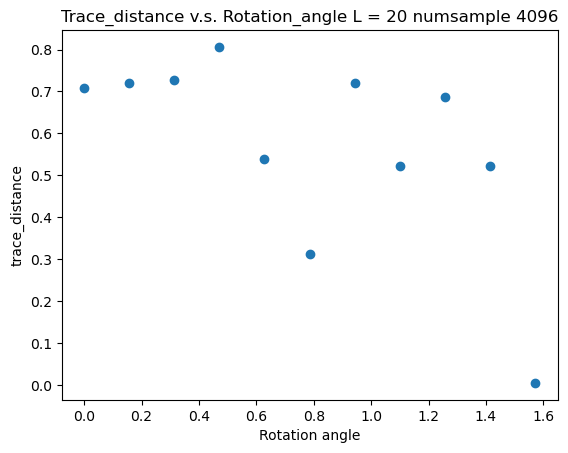

In [129]:
trace_dis = []
E_diff = []
for a in range(11):
    evals = np.load("RBM"+str(a)+"_exact_L=20.npy")
    nqs = np.load("RBM" + str(a) + "L=20_numsample4096_amp.npy")
    nqs_norm = np.linalg.norm(np.exp(nqs).astype(np.complex128))
    diff = (np.exp(nqs) / nqs_norm - evals)
    trace_dis.append(np.sqrt(1-np.abs(np.sum(np.conj(np.exp(nqs)/nqs_norm)*evals))**2))
    E_diff.append(json.load(open("RBM"+str(a)+"L=20"+".log"))['Energy']['Mean']['real'][-1]+20)

plt.scatter(np.arange(11)*np.pi*0.05, trace_dis)
plt.ylabel("trace_distance")
plt.xlabel("Rotation angle")
plt.title("Trace_distance v.s. Rotation_angle L = 20 numsample 4096")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

0
1
2
3
4
5
6
7
8


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


9
10


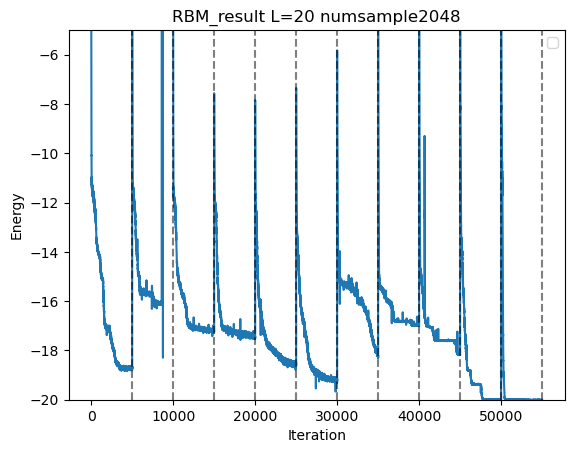

In [119]:
import numpy as np
import json
import matplotlib.pyplot as plt
iters_ = []
E = []
a = 11
for i in range (a):
    print(i)
    data=json.load(open("RBM"+str(i)+"L=20"+".log"))
    iters = data['Energy']['iters']
    iters_.append(iters)
    energy=data['Energy']['Mean']['real']
    E.append(energy)
    plt.legend()
flat_iter = [
    x
    for xs in iters_
    for x in xs
]
flat_E = [
    x
    for xs in E
    for x in xs
]
flat_iter = np.arange(len(flat_iter))
plt.plot(flat_iter, flat_E)
plt.title("RBM_result L=20 numsample2048")
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.ylim(-20, -5)
x = np.repeat(np.linspace(5000, 55000, 11), 2).reshape(11, 2)
for i in range(len(x)):
    plt.plot(x[i], [-20, 0], color = 'black', linestyle = 'dashed', alpha = 0.5)
plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

0
1
2
3
4
5
6
7
8
9


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


10


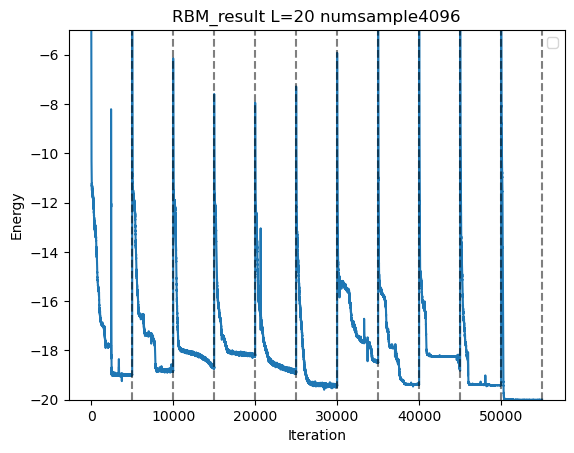

In [120]:
import numpy as np
import json
import matplotlib.pyplot as plt
iters_ = []
E = []
a = 11
for i in range (a):
    print(i)
    data=json.load(open("RBM"+str(i)+"L=20_numsample=4096"+".log"))
    iters = data['Energy']['iters']
    iters_.append(iters)
    energy=data['Energy']['Mean']['real']
    E.append(energy)
    plt.legend()
flat_iter = [
    x
    for xs in iters_
    for x in xs
]
flat_E = [
    x
    for xs in E
    for x in xs
]
flat_iter = np.arange(len(flat_iter))
plt.plot(flat_iter, flat_E)
plt.title("RBM_result L=20 numsample4096")
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.ylim(-20, -5)
x = np.repeat(np.linspace(5000, 55000, 11), 2).reshape(11, 2)
for i in range(len(x)):
    plt.plot(x[i], [-20, 0], color = 'black', linestyle = 'dashed', alpha = 0.5)
plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

0
1
2
3
4
5
6
7
8
9
10


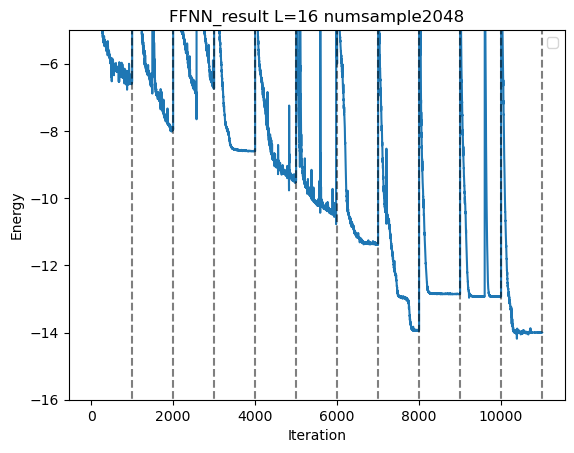

In [128]:
import numpy as np
import json
import matplotlib.pyplot as plt
iters_ = []
E = []
a = 11
for i in range (a):
    print(i)
    data=json.load(open("FFNN/FFNN"+str(i)+".log"))
    iters = data['Energy']['iters']
    iters_.append(iters)
    energy=data['Energy']['Mean']['real']
    E.append(energy)
    plt.legend()
flat_iter = [
    x
    for xs in iters_
    for x in xs
]
flat_E = [
    x
    for xs in E
    for x in xs
]
flat_iter = np.arange(len(flat_iter))
plt.plot(flat_iter, flat_E)
plt.title("FFNN_result L=16 numsample2048")
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.ylim(-16, -5)
x = np.repeat(np.linspace(1000, 11000, 11), 2).reshape(11, 2)
for i in range(len(x)):
    plt.plot(x[i], [-20, 0], color = 'black', linestyle = 'dashed', alpha = 0.5)
plt.legend()
